In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Задание 1

In [2]:
a = 1  # границы отрезка

In [3]:
def f(x):
    return (x**2 + np.sin(x))

In [4]:
# поиск корней полинома Чебышева
def Ch(n, a):
    X = []
    for i in range(n):
        X.append(a * np.cos((2 * i + 1) / (2 * n) * np.pi))
    return X

In [5]:
# LU разложение
def LU(u, n):  
    l = np.zeros((n, n), dtype=float)
    p = np.eye(n)
    q = np.eye(n)
    for i in range(n):
        u1 = u[i:, i:]
        a = u1.argmax()
        col = a % (n - i)
        line = a // (n - i)
        p1 = np.eye(n, dtype=int)
        p1[i, i] = 0
        p1[line + i, line + i] = 0
        p1[line + i, i] = 1
        p1[i, line + i] = 1
        q1 = np.eye(n, dtype=int)
        q1[i, i] = 0
        q1[col + i, col + i] = 0
        q1[i, col + i] = 1
        q1[col + i, i] = 1
        p = p1.dot(p)
        q = q.dot(q1)
        u = (p1.dot(u)).dot(q1)
    for i in range(n):
        l[i, i] = 1
        for j in range(i + 1, n):
            l[j, i] = u[j, i] / u[i, i]
            u[j] -= l[j, i] * u[i]
    return l, u, p, q

In [6]:
# решение системы с помощью LU разложения
def AxB(l, u, b, n):
    y = np.zeros(n, dtype=float)  # Ly=b
    y[0] = b[0]
    for i in range(1, n):
        y[i] = b[i]
        for k in range(i):
            y[i] -= l[i, k] * y[k]
    nul_lines_U = 0  # проверка на совместность
    nul_y = 0
    for i in reversed(range(n)):
        flag = True
        for j in range(n):
            if abs(u[i, j]) > 1e-10:
                flag = False
        if flag:
            nul_lines_U += 1
        if abs(y[i]) < 1e-10:
            nul_y += 1
    if nul_lines_U > nul_y:
        print('Система не совместна')
    else:
        rang = n - nul_lines_U
        x = np.zeros(n, dtype=float)  # Ux=y
        filled_x = []
        for i in range(n):
            filled_x.append(0)
        for i in reversed(range(rang)):
            p = i
            unknown = 0
            for k in range(p, n):
                if filled_x[k] == 0 and abs(u[i, k]) > 1e-10:
                    unknown += 1
                    if unknown == 1:
                        p = k
            if unknown > 1:
                for k in range(p + 1, n):
                    if filled_x[k] == 0 and abs(u[i, k]) > 1e-10:
                        x[k] = 0
                        filled_x[k] = 1
            x[p] = y[i]
            k = i
            while k != n - 1:
                k += 1
                if k != p and abs(u[i, k]) > 1e-10:
                    x[p] -= u[i, k] * x[k]
            x[p] = x[p] / u[i, p]
            filled_x[p] = 1
        for i in range(n):
            if filled_x[i] == 0:
                x[i] = 0
        return x
    return 0

In [7]:
# построение многочлена наилучшего среднеквадратического приближения третьей степени. 
# aппроксимация семейством алгебраических многочленов (1, x, x^2, ...)
def PolynomialDegN(x, X, f, deg=3):
    numOfNodes = len(X)
    numOfCoeff = deg + 1

    # получение вектора коэффициентов а с помощью решения систеемы Ha=b, где H=Q.T@Q, b=Q.T@y
    Q = np.zeros((numOfNodes, 4))
    y = np.zeros((numOfNodes, 1))
    for i in range(numOfNodes):
        for j in range(numOfCoeff):
            Q[i][j] = X[i]**j
        y[i] = f(X[i])
    H = Q.T @ Q
    b = Q.T @ y
    l, u, p, q = LU(H, numOfCoeff)
    a = AxB(l, u, p.dot(b), numOfCoeff)
    a = q @ a
    # получение значения полинома в точке х
    result = 0
    for i in range(numOfCoeff):
        result += a[i] * x**i
    return result

In [8]:
X = np.linspace(-a, a, num=3)
x = np.linspace(-a, a, num=200)
X_Ch = Ch(3, a)

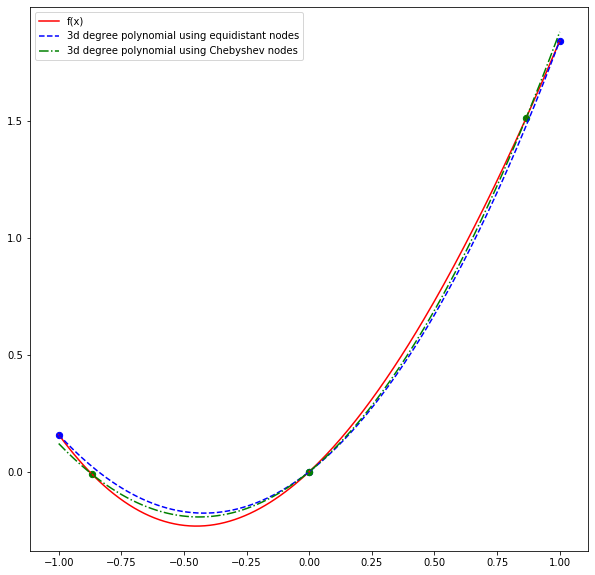

In [9]:
plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
plt.plot(x, [f(_) for _ in x], 'r-', label='f(x)')
plt.plot(x, [PolynomialDegN(_, X, f) for _ in x], 'b--', label='3d degree polynomial using equidistant nodes')
plt.plot(x, [PolynomialDegN(_, X_Ch, f) for _ in x], 'g-.', label='3d degree polynomial using Chebyshev nodes')
plt.scatter(X, [PolynomialDegN(_, X, f) for _ in X], color='blue', s=40, marker='o')
plt.scatter(X_Ch,
            [PolynomialDegN(_, X_Ch, f) for _ in X_Ch],
            color='green',
            s=40,
            marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

In [10]:
# подсчет погрешности
def error(x, X, func, polynomial, f=f):
    sum = 0
    for i in x:
        diff = abs(f(i) - polynomial(i, X, func))
        sum += diff**2
    return np.sqrt(sum / len(x))

#### Подсчет погрешностей для полиномов, построенных по равноотстоящим узлам и по корням полинома Чебышева.
Из полученной таблицы видно, что узлы Чебышева дают более точное приближение функции.

In [11]:
x = np.linspace(-a, a, num=200)
print('N\t| E(eq nodes)\t|  E(Ch nodes)\t|')
print('-'*41)
for N in range(3,11):
    print(N,'\t|', end=' ')
    X = np.linspace(-a, a, num = N)
    print(float("{0:.10f}".format(error(x, X, f,PolynomialDegN))),'\t|', end='')
    X_Ch = Ch(N, a)
    print(float("{0:.10f}".format(error(x, X_Ch, f,PolynomialDegN))),'\t|')

N	| E(eq nodes)	|  E(Ch nodes)	|
-----------------------------------------
3 	| 0.0429121519 	|0.0276051604 	|
4 	| 0.0006603328 	|0.0004041629 	|
5 	| 0.0004781131 	|0.000353888 	|
6 	| 0.0004402499 	|0.0003531656 	|
7 	| 0.0004227277 	|0.0003531681 	|
8 	| 0.0004092793 	|0.0003531681 	|
9 	| 0.0003977214 	|0.0003531681 	|
10 	| 0.0003876954 	|0.0003531681 	|


# Задание 2

In [12]:
# функция со случайной погрешностью в интервале от −1% до 1%
def funcWithError(x, f=f, percent=1):
    errorPercent = random.uniform(-percent, percent)
    return f(x) * (1 + errorPercent / 100)

In [13]:
# построение интерполяционного полинома Лагранжа
def Lagrange(x, X, f):
    L = 0
    for i in range(len(X)):
        l_k = 1 # подсчет коэффициентов полинома Лагранжа
        for j in range(len(X)):
            if j != i:
                l_k *= (x - X[j]) / (X[i] - X[j])
        L += l_k * f(X[i])
    return L

#### Сравнение точностей многочлена наилучшего среднеквадратического приближения третьей степени и интерполяционного многочлена Лагранжа для значений функции с погрешностью.
В условиях данной задачи более точным оказался многочлена наилучшего среднеквадратического приближения третьей степени. При увеличении числа узлов сходимость многочлена наилучшего среднеквадратического приближения не налюдается, а погрешность полинома Лагранжа начинает расти.

In [14]:
x = np.linspace(-a, a, num=200)
print('\t|\t3d degree polynomial\t|\tLagrange polynomial\t|')
print('-'*73)
print('N\t|' + ' E(eq nodes)\t|  E(Ch nodes)\t|'*2)
print('-'*73)
for N in range(3,15):
    print(N,'\t|', end=' ')
    X = np.linspace(-a, a, num = N)
    X_Ch = Ch(N, a)
    print(float("{0:.10f}".format(error(x, X, funcWithError, PolynomialDegN))),'\t| ', end='')
    print(float("{0:.10f}".format(error(x, X_Ch, funcWithError, PolynomialDegN))),'\t| ', end='')
    print(float("{0:.10f}".format(error(x, X, funcWithError, Lagrange))),'\t| ', end='')
    print(float("{0:.10f}".format(error(x, X_Ch, funcWithError, Lagrange))),'\t|')

	|	3d degree polynomial	|	Lagrange polynomial	|
-------------------------------------------------------------------------
N	| E(eq nodes)	|  E(Ch nodes)	| E(eq nodes)	|  E(Ch nodes)	|
-------------------------------------------------------------------------
3 	| 0.0435912633 	| 0.0278142312 	| 0.0429392011 	| 0.0279590737 	|
4 	| 0.0034365297 	| 0.0039994239 	| 0.0032193632 	| 0.0037630593 	|
5 	| 0.0033375674 	| 0.0039378353 	| 0.0035906125 	| 0.0035677695 	|
6 	| 0.0032282426 	| 0.0033843056 	| 0.0034991087 	| 0.0037820585 	|
7 	| 0.0030295563 	| 0.0033344987 	| 0.0038341571 	| 0.0038190442 	|
8 	| 0.0028687059 	| 0.0033082225 	| 0.0045039945 	| 0.0041757901 	|
9 	| 0.0028981954 	| 0.0027280217 	| 0.0061890745 	| 0.0036047008 	|
10 	| 0.002576782 	| 0.0028028216 	| 0.0057690846 	| 0.0033498031 	|
11 	| 0.002451508 	| 0.0025374421 	| 0.0073715508 	| 0.0036313181 	|
12 	| 0.0027611073 	| 0.0024683607 	| 0.0115244011 	| 0.0040090764 	|
13 	| 0.0024936524 	| 0.0026915627 	| 0.016354372 	

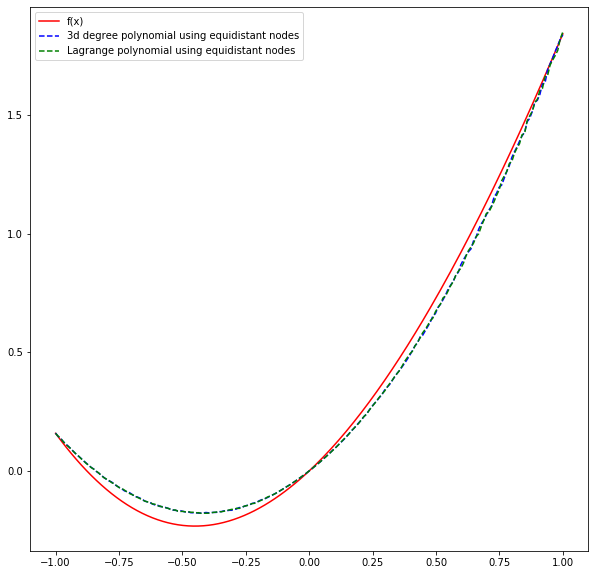

In [15]:
X = np.linspace(-a, a, num=3)
x = np.linspace(-a, a, num=200)
plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
plt.plot(x, [f(_) for _ in x], 'r-', label='f(x)')
plt.plot(x, [PolynomialDegN(_, X, funcWithError) for _ in x], 'b--', label='3d degree polynomial using equidistant nodes')
plt.plot(x, [Lagrange(_, X, funcWithError) for _ in x], 'g--', label='Lagrange polynomial using equidistant nodes')
plt.legend()
plt.show()

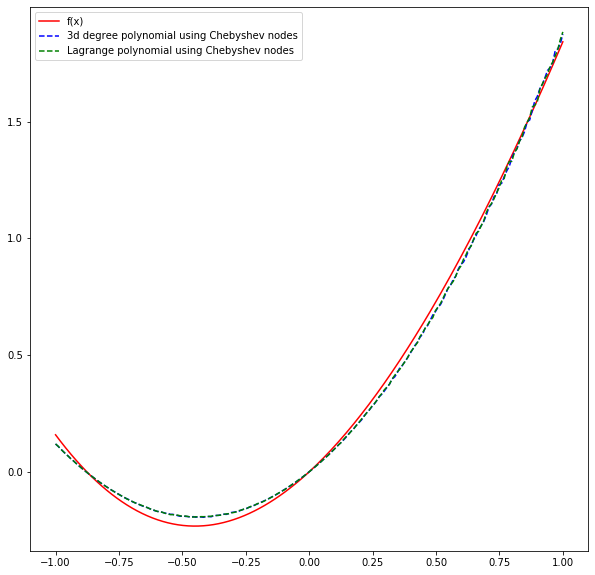

In [16]:
X_Ch = Ch(3, a)
x = np.linspace(-a, a, num=200)
plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
plt.plot(x, [f(_) for _ in x], 'r-', label='f(x)')
plt.plot(x, [PolynomialDegN(_, X_Ch, funcWithError) for _ in x], 'b--', label='3d degree polynomial using Chebyshev nodes')
plt.plot(x, [Lagrange(_, X_Ch, funcWithError) for _ in x], 'g--', label='Lagrange polynomial using Chebyshev nodes')
plt.legend()
plt.show()

# Задание 3

In [17]:
# Аппроксимация семейством многочлена Лежандра
def Legendre(x, X, f, deg=3):
    numOfCoeff = deg + 1
    L = [1, -x, (12 * x**2 - 4) / 8, (72 * x - 120 * x**3) / 48]
    CkChisl = [
        0.6666666666666667, -0.6023373578795136, 0.2666666666666667,
        0.01801316223422503
    ]
    CkZnam = [2, 0.6666666666666667, 0.4, 0.2857142857142857]

    result = 0
    for i in range(numOfCoeff):
        result += (CkChisl[i]/CkZnam[i])*L[i]
    return result

Из полученной ниже таблицы видно, что многочлен, построенный с помощью полиномов Лежандра обладает той же точностью, что и предельный полином из задания 1. Это объясняется тем, что полиномы Лежандра - это частнй случай алгебраических ортогональных полиномов.
При увеличении количества равноотстоящих узлов видно, что многочлен из задания 2 не сходится.

In [18]:
x = np.linspace(-a, a, num=200)
print('N\t| E(3d degree with e)\t| E(3d degree ) |')
print('-'*50)
for N in range(3,40):
    print(N,'\t|', end=' ')
    X = np.linspace(-a, a, num = N)
    print(float("{0:.10f}".format(error(x, X, funcWithError, PolynomialDegN))),'\t\t| ', end='')
    print(float("{0:.10f}".format(error(x, X, f, PolynomialDegN))),'\t|')
print('\n','E(Legendre):',float("{0:.10f}".format(error(x, X, f, Legendre))))

N	| E(3d degree with e)	| E(3d degree ) |
--------------------------------------------------
3 	| 0.0431949608 		| 0.0429121519 	|
4 	| 0.003760408 		| 0.0006603328 	|
5 	| 0.0038433178 		| 0.0004781131 	|
6 	| 0.0032519439 		| 0.0004402499 	|
7 	| 0.0032323213 		| 0.0004227277 	|
8 	| 0.0033627418 		| 0.0004092793 	|
9 	| 0.0028466662 		| 0.0003977214 	|
10 	| 0.0027752555 		| 0.0003876954 	|
11 	| 0.002483966 		| 0.0003790397 	|
12 	| 0.0028730793 		| 0.0003715927 	|
13 	| 0.0022773879 		| 0.0003651899 	|
14 	| 0.0025434655 		| 0.0003596773 	|
15 	| 0.0027131916 		| 0.0003549184 	|
16 	| 0.002228491 		| 0.0003507961 	|
17 	| 0.0022501329 		| 0.0003472114 	|
18 	| 0.0021197884 		| 0.0003440818 	|
19 	| 0.0024337852 		| 0.0003413385 	|
20 	| 0.0023170321 		| 0.0003389242 	|
21 	| 0.0020319816 		| 0.0003367912 	|
22 	| 0.0022032229 		| 0.0003348998 	|
23 	| 0.001879583 		| 0.0003332165 	|
24 	| 0.0020037072 		| 0.0003317133 	|
25 	| 0.002025881 		| 0.0003303666 	|
26 	| 0.0019812836 		|

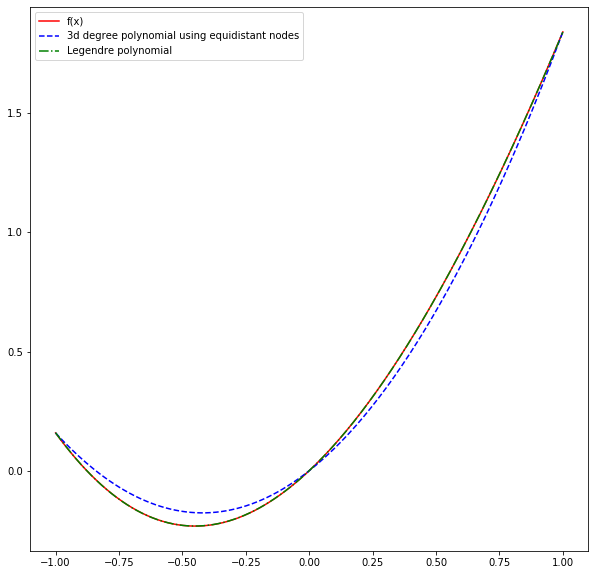

In [19]:
X = np.linspace(-a, a, num=3)
x = np.linspace(-a, a, num=200)
plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
plt.plot(x, [f(_) for _ in x], 'r-', label='f(x)')
plt.plot(x, [PolynomialDegN(_, X, f) for _ in x], 'b--', label='3d degree polynomial using equidistant nodes')
plt.plot(x, [Legendre(_, X, f) for _ in x], 'g-.', label='Legendre polynomial')
# plt.axis('equal')
plt.legend()
plt.show()